In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "burak3ergun/loan-data-set",
  'loan_data_set.csv')
import pandas as pd
import numpy as np

/tmp/ipython-input-2371973458.py:3: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 37.1k/37.1k [00:00<00:00, 37.5MB/s]


In [ ]:
df.shape[0]

576

In [12]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
df.isna().sum()


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [3]:
# df.isna().sum()
# df[df['Gender'].isna()]
df['Gender'].fillna('Other', inplace = True)
# df.isna().sum()
df['Gender'].unique()

/tmp/ipython-input-259338507.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna('Other', inplace = True)


array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
df[df['Married'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [4]:
df.dropna(subset=['Married'], inplace=True)

In [5]:
df['Dependents'].fillna('0', inplace=True)

/tmp/ipython-input-4287590747.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].fillna('0', inplace=True)


In [ ]:
df['Self_Employed'].unique()
# df[df['Self_Employed'].isna()]

array(['No', 'Yes'], dtype=object)

In [6]:
df['Self_Employed'].fillna('No', inplace=True)

/tmp/ipython-input-372047051.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Self_Employed'].fillna('No', inplace=True)


In [7]:
df[df['LoanAmount'].isna()].shape[0]
df.dropna(subset=['LoanAmount'], inplace=True)

In [8]:
df[df['Loan_Amount_Term'].isna()].shape[0]
df.dropna(subset=['Loan_Amount_Term'], inplace=True)

In [ ]:
# df['Credit_History'].unique()
df[df['Credit_History'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,No,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,No,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y
129,LP001465,Male,Yes,0,Graduate,No,6080,2569.0,182.0,360.0,NaN,Rural,N


In [ ]:
credit_zero_loan_yes = df[(df['Credit_History'] == 0) & (df['Loan_Status'] == 'Y')].shape[0]
credit_zero_loan_no = df[(df['Credit_History'] == 0) & (df['Loan_Status'] == 'N')].shape[0]
print(credit_zero_loan_yes/(credit_zero_loan_yes+credit_zero_loan_no)*100)
print(credit_zero_loan_no/(credit_zero_loan_yes+credit_zero_loan_no)*100)

7.865168539325842
92.13483146067416


In [ ]:
credit_one_loan_yes = df[(df['Credit_History'] == 1) & (df['Loan_Status'] == 'Y')].shape[0]
credit_one_loan_no = df[(df['Credit_History'] == 1) & (df['Loan_Status'] == 'N')].shape[0]
print(credit_one_loan_yes/(credit_one_loan_yes+credit_one_loan_no)*100)
print(credit_one_loan_no/(credit_one_loan_yes+credit_one_loan_no)*100)

79.57894736842105
20.42105263157895


In [ ]:
credit_nan_loan_yes = df[(df['Credit_History'].isna()) & (df['Loan_Status'] == 'Y')].shape[0]
credit_nan_loan_no = df[(df['Credit_History'].isna()) & (df['Loan_Status'] == 'N')].shape[0]
print(credit_nan_loan_yes/(credit_nan_loan_yes+credit_nan_loan_no)*100)
print(credit_nan_loan_no/(credit_nan_loan_yes+credit_nan_loan_no)*100)

74.0
26.0


In [9]:
df['Credit_History'].fillna(1.0, inplace=True)

/tmp/ipython-input-858526279.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(1.0, inplace=True)


Assuming :-
Gender Nan -> Others,
Self Employed Nan -> No,
Credit Hostory Nan - 1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

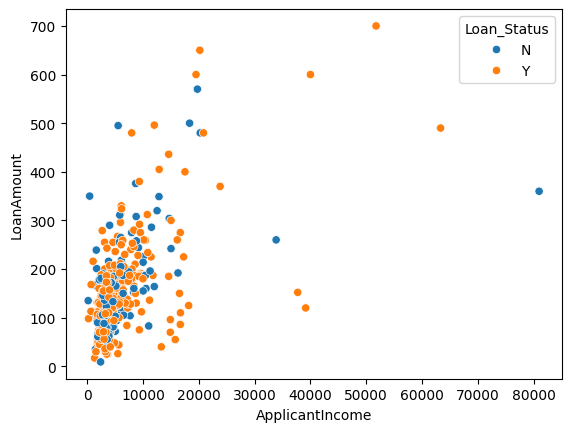

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data = df, x = 'ApplicantIncome', y = 'LoanAmount', hue = 'Loan_Status')

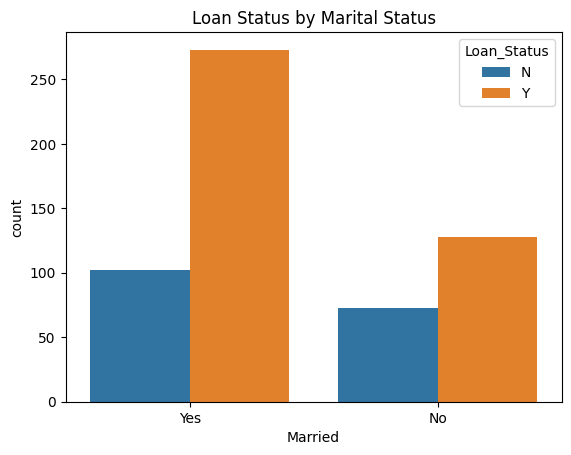

In [17]:
sns.countplot(data=df, x='Married', hue='Loan_Status')
plt.title("Loan Status by Marital Status")
plt.show()

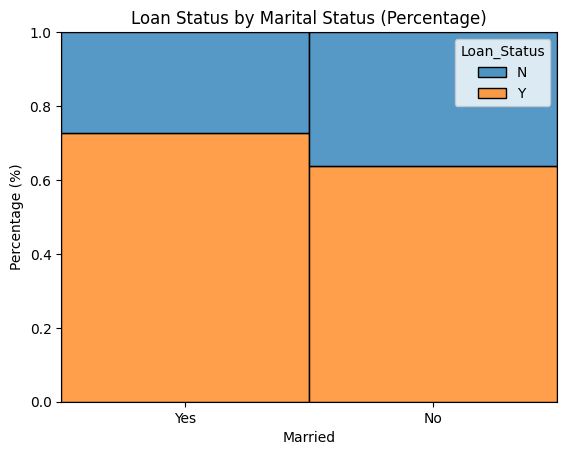

In [25]:
sns.histplot(data=df, x='Married', hue='Loan_Status', multiple='fill',  stat='percent')
plt.title("Loan Status by Marital Status (Percentage)")
plt.ylabel("Percentage (%)")
plt.show()

Married person has slightly more approval rate in comparison to Unmarried persons

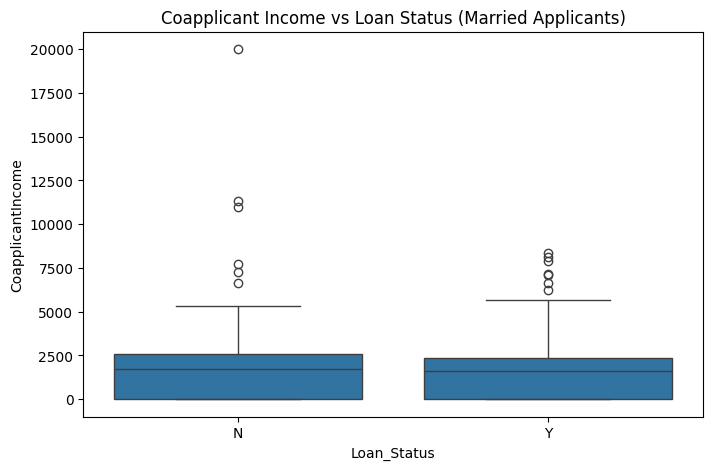

In [18]:
df_married = df[df['Married'] == 'Yes']

plt.figure(figsize=(8,5))
sns.boxplot(data=df_married, x='Loan_Status', y='CoapplicantIncome')
plt.title("Coapplicant Income vs Loan Status (Married Applicants)")
plt.show()

So Coapplicant income is not really affecting for married persons.

Text(0.5, 1.0, 'Loan Status by Gender')

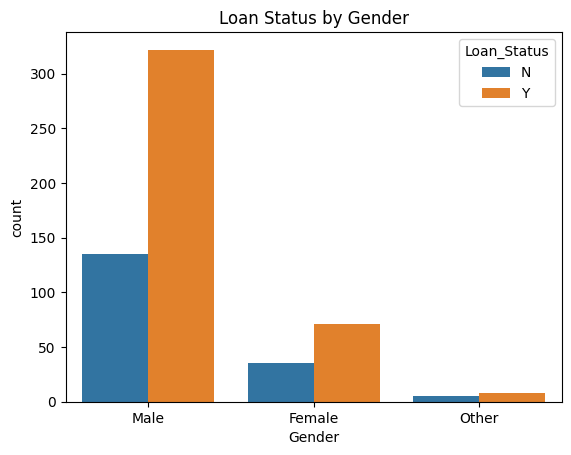

In [19]:
sns.countplot(data=df, x='Gender', hue = 'Loan_Status')
plt.title("Loan Status by Gender")

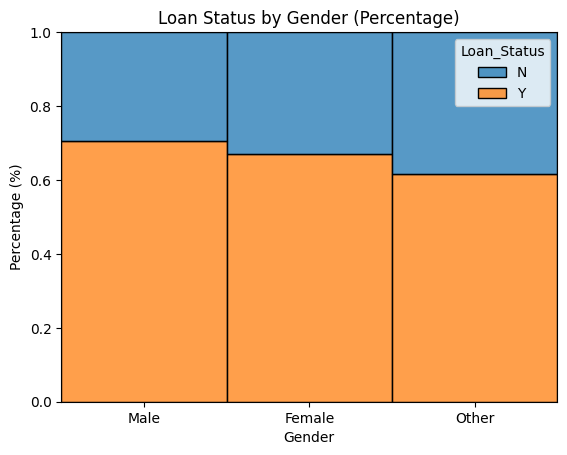

In [24]:
sns.histplot(data=df, x='Gender', hue='Loan_Status', multiple='fill',  stat='percent')
plt.title("Loan Status by Gender (Percentage)")
plt.ylabel("Percentage (%)")
plt.show()

So, Gender has some sort of bias but that is very nominal.

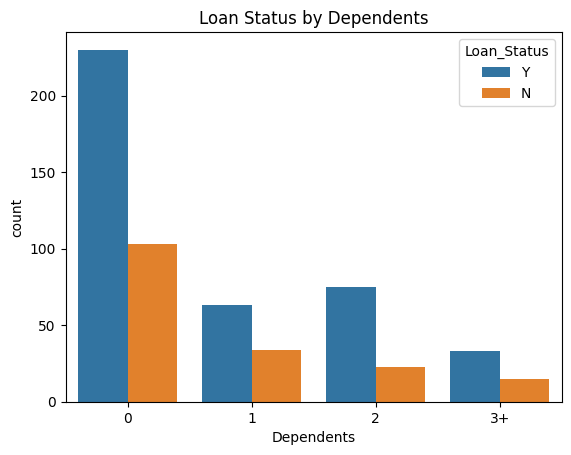

In [28]:
df_sortedDependents = df.sort_values(by='Dependents')
sns.countplot(data=df_sortedDependents, x='Dependents', hue = 'Loan_Status')
plt.title("Loan Status by Dependents")
plt.show()

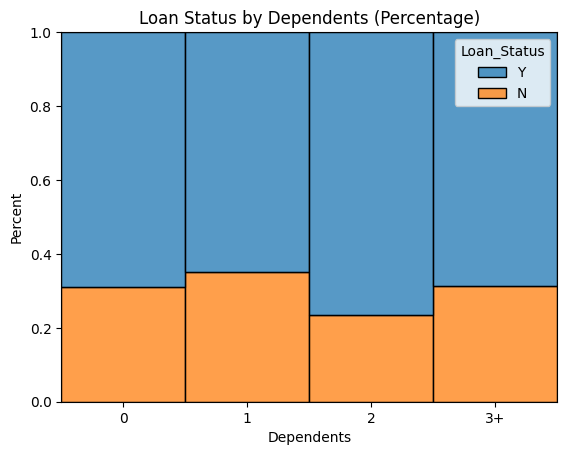

In [29]:
sns.histplot(data = df_sortedDependents, x='Dependents', stat = 'percent', hue = 'Loan_Status', multiple = 'fill')
plt.title("Loan Status by Dependents (Percentage)")
plt.show()


So Dependents soesn't really affect the calculation for Loan Status.

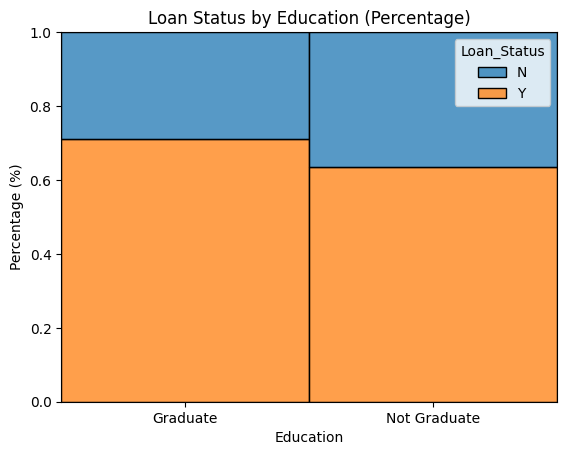

In [30]:
sns.histplot(data=df, x='Education', hue='Loan_Status', multiple='fill',  stat='percent')
plt.title("Loan Status by Education (Percentage)")
plt.ylabel("Percentage (%)")
plt.show()

So, Garudated applicants have slight advantage over Non-Graaduated applicants over loan approval.

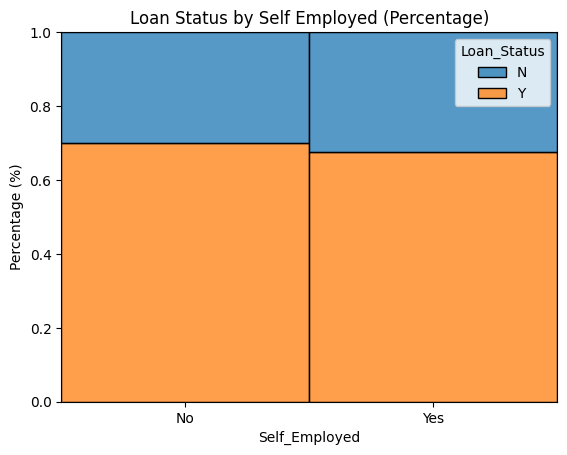

In [31]:
sns.histplot(data=df, x='Self_Employed', hue='Loan_Status', multiple='fill',  stat='percent')
plt.title("Loan Status by Self Employed (Percentage)")
plt.ylabel("Percentage (%)")
plt.show()

The applicant is Self-Employed or not has little consideration when it comes to determining loan approval status.

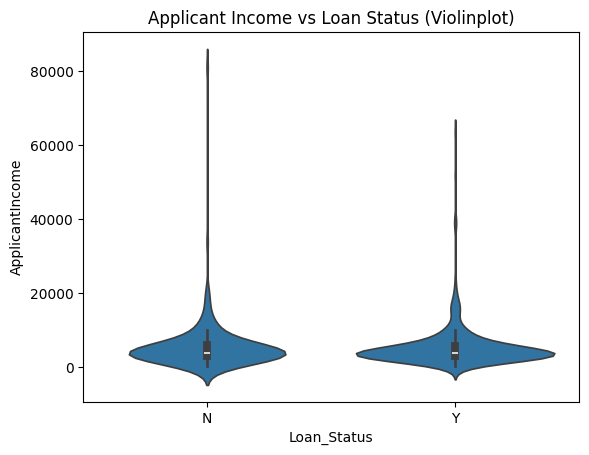

In [32]:
sns.violinplot(data=df, x='Loan_Status', y='ApplicantIncome')
plt.title("Applicant Income vs Loan Status (Violinplot)")
plt.show()

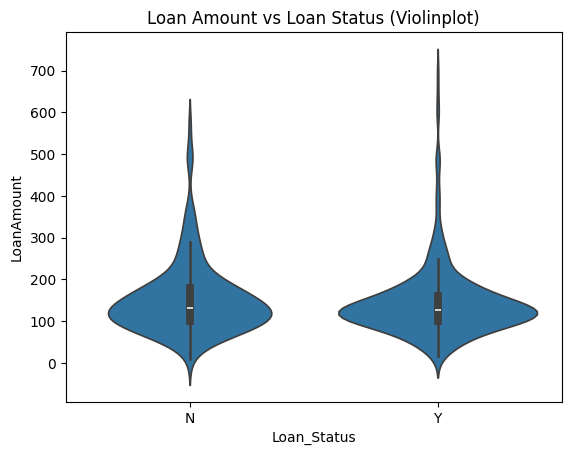

In [33]:
sns.violinplot(data=df, x='Loan_Status', y='LoanAmount')
plt.title("Loan Amount vs Loan Status (Violinplot)")
plt.show()

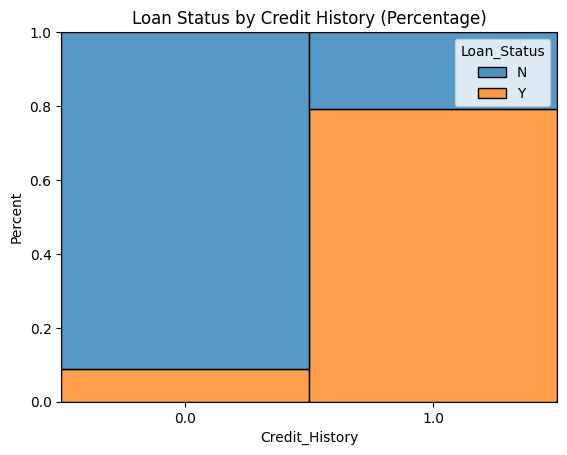

In [44]:
df_creditHistory_asCategory = df.drop('Credit_History', axis =1).assign(Credit_History = (df['Credit_History']).astype(str))
df_creditHistory_asCategory.sort_values(by='Credit_History', key=lambda x: x.astype(float), ascending=True, inplace=True)
sns.histplot(data = df_creditHistory_asCategory, x='Credit_History', hue='Loan_Status', multiple='fill',  stat='percent')
plt.title("Loan Status by Credit History (Percentage)")
plt.show()

Credit History plays a major role on deciding wheather the loan will be approved or not.

Decision Tree Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['Loan_ID', 'Loan_Status'], axis=1), df['Loan_Status'], test_size=0.2, random_state=42)

categorical_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']  # example
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier())
])

clf.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area',
                                                   'Dependents'])])),
                ('model', DecisionTreeClassifier())])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_dt = clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy: 0.6724137931034483

Confusion Matrix:
 [[20 15]
 [23 58]]

Classification Report:
               precision    recall  f1-score   support

           N       0.47      0.57      0.51        35
           Y       0.79      0.72      0.75        81

    accuracy                           0.67       116
   macro avg       0.63      0.64      0.63       116
weighted avg       0.70      0.67      0.68       116



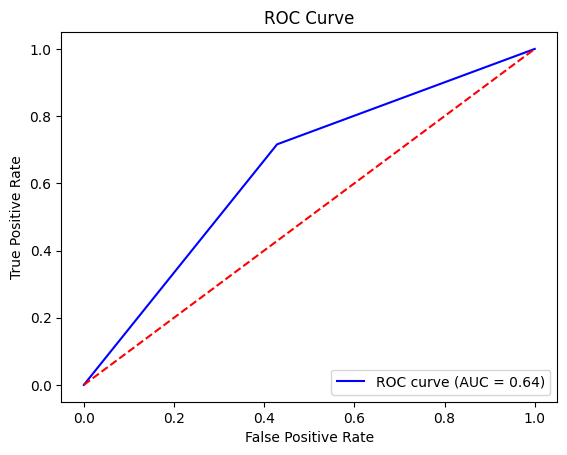

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y_pred_proba = clf.predict_proba(x_test)[:, 1]  # probability for positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='Y')

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # baseline (random guess)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

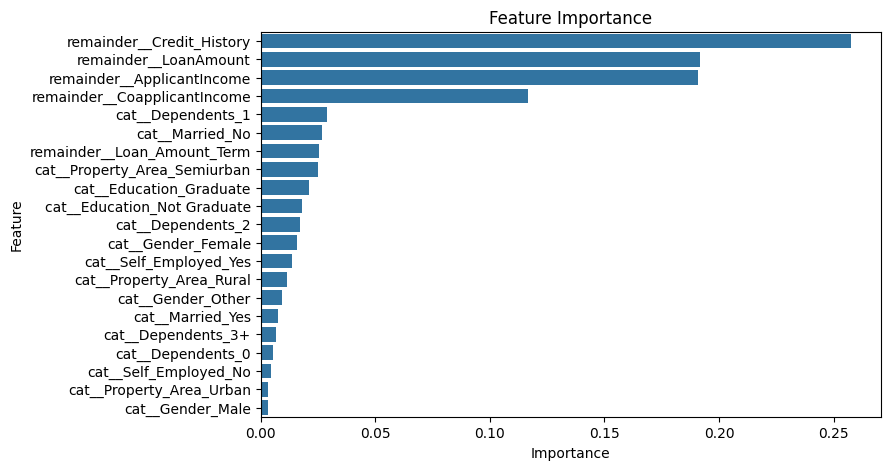

In [ ]:
import seaborn as sns

feature_names = clf.named_steps['preprocessor'].get_feature_names_out()

# Get feature importances
importances = clf.named_steps['model'].feature_importances_

# Get feature importances
# importances = dt.feature_importances_
# feature_names = x_train.columns

# Make DataFrame
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Feature Importance")
plt.show()

KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

cknn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
])

cknn.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area',
                                                   'Dependents'])])),
                ('scaler', StandardScaler()),
                ('model', KNeighborsClassifier())])

In [ ]:
y_pred_knn = cknn.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

Accuracy: 0.75

Confusion Matrix:
 [[10 25]
 [ 4 77]]

Classification Report:
               precision    recall  f1-score   support

           N       0.71      0.29      0.41        35
           Y       0.75      0.95      0.84        81

    accuracy                           0.75       116
   macro avg       0.73      0.62      0.62       116
weighted avg       0.74      0.75      0.71       116



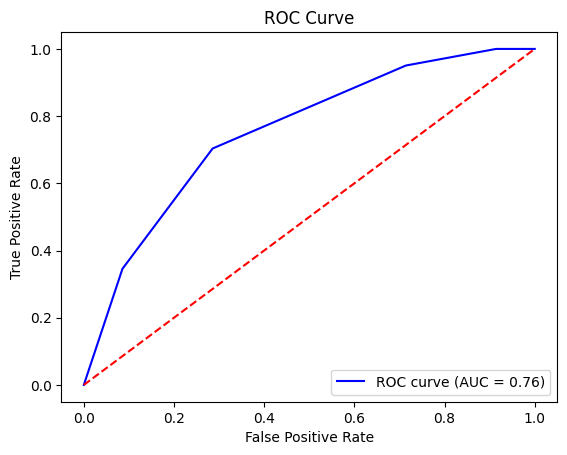

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y_pred_proba = cknn.predict_proba(x_test)[:, 1]  # probability for positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='Y')

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # baseline (random guess)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()